In [342]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [343]:
company=pd.read_csv("Company_Data.csv")

In [344]:
company.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [345]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [346]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [347]:
company["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [348]:
company[company["ShelveLoc"]=="Medium"].describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,7.306575,125.095890,67.351598,6.538813,259.401826,115.652968,54.155251,13.931507
std,2.266373,15.583599,28.310688,6.680253,154.877765,23.098674,15.969398,2.661286
min,0.000000,77.000000,21.000000,0.000000,12.000000,24.000000,25.000000,10.000000
25%,5.625000,115.000000,42.000000,0.000000,124.000000,101.000000,42.000000,12.000000
50%,7.380000,125.000000,69.000000,5.000000,261.000000,117.000000,55.000000,14.000000
75%,8.775000,135.000000,88.500000,12.000000,405.000000,131.000000,66.000000,16.000000
max,13.360000,175.000000,120.000000,29.000000,509.000000,185.000000,80.000000,18.000000


In [349]:
company[company["ShelveLoc"]=="Bad"].describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000
mean,5.522917,124.010417,72.239583,6.21875,275.291667,114.270833,52.052083,13.958333
std,2.356349,15.181356,26.908713,6.46318,147.233571,23.779460,17.405002,2.587080
min,0.370000,86.000000,21.000000,0.00000,10.000000,64.000000,25.000000,10.000000
25%,4.052500,116.000000,52.750000,0.00000,145.500000,96.750000,38.000000,12.000000
50%,5.210000,123.500000,73.000000,4.50000,296.000000,113.500000,52.000000,14.000000
75%,7.462500,134.000000,93.000000,11.00000,400.500000,130.000000,68.000000,16.000000
max,11.670000,161.000000,120.000000,23.00000,501.000000,191.000000,80.000000,18.000000


In [350]:
company[company["ShelveLoc"]=="Good"].describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,10.214000,125.752941,67.976471,7.352941,267.047059,117.882353,52.611765,13.752941
std,2.501243,14.977686,28.314970,6.802846,127.253581,25.128911,15.428093,2.576939
min,3.580000,89.000000,21.000000,0.000000,14.000000,53.000000,25.000000,10.000000
25%,8.330000,115.000000,41.000000,0.000000,176.000000,103.000000,40.000000,11.000000
50%,10.500000,123.000000,70.000000,7.000000,272.000000,122.000000,54.000000,14.000000
75%,11.960000,137.000000,93.000000,12.000000,353.000000,132.000000,63.000000,16.000000
max,16.270000,157.000000,117.000000,24.000000,503.000000,173.000000,80.000000,18.000000


<AxesSubplot:>

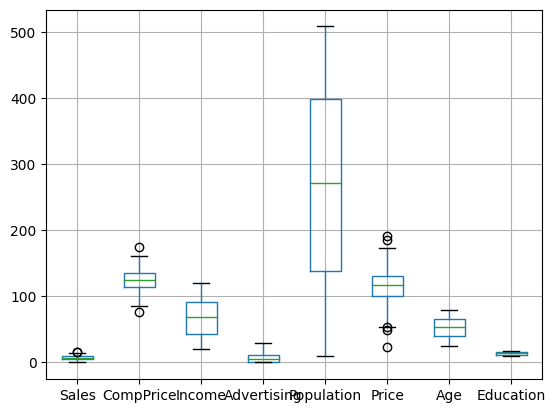

In [351]:
company.boxplot()

In [352]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [353]:
from sklearn.preprocessing import StandardScaler


scale=StandardScaler()

In [354]:
company.drop(["ShelveLoc","Urban","US"],axis=1).columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [355]:
company_scaled=scale.fit_transform(company.drop(["ShelveLoc","Urban","US"],axis=1))

In [356]:
company_scaled=pd.DataFrame(company_scaled, columns=[company.drop(["ShelveLoc","Urban","US"],axis=1).columns])

<AxesSubplot:>

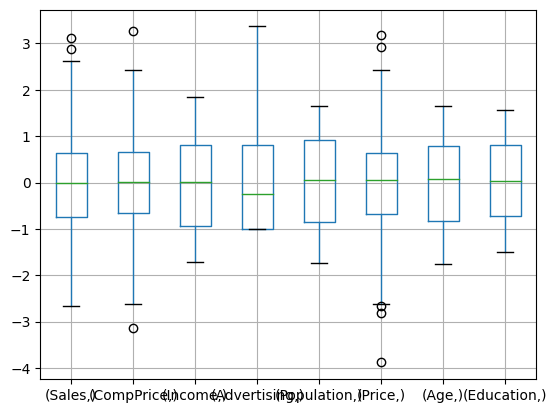

In [357]:
company_scaled.boxplot()

In [358]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [359]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [360]:
company["Difference_price"]=company["CompPrice"].values-company["Price"]

In [361]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Difference_price
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,9.180000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,19.262664
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,-46.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,-4.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,9.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,21.250000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,57.000000


In [362]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   ShelveLoc         400 non-null    object 
 7   Age               400 non-null    int64  
 8   Education         400 non-null    int64  
 9   Urban             400 non-null    object 
 10  US                400 non-null    object 
 11  Difference_price  400 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [363]:
column_cat=["ShelveLoc",'Urban','US']

In [364]:
column_cont=company.columns.drop(["ShelveLoc",'Urban','US'])
column_cont

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Difference_price'],
      dtype='object')

In [365]:
company.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Difference_price
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,28


In [366]:
company[["ShelveLoc","Urban","US"]]

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No
...,...,...,...
395,Good,Yes,Yes
396,Medium,No,Yes
397,Medium,Yes,Yes
398,Bad,Yes,Yes


In [367]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Difference_price
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,13


<AxesSubplot:>

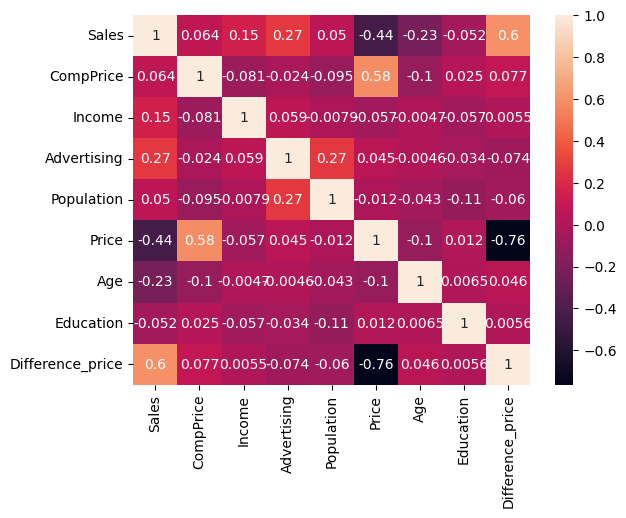

In [368]:
import seaborn as sns
sns.heatmap(company.corr(), annot=True)

<AxesSubplot:xlabel='None', ylabel='None'>

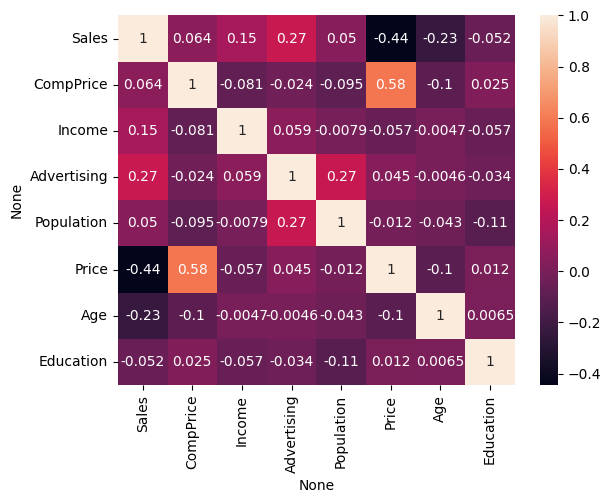

In [369]:
sns.heatmap(company_scaled.corr(), annot=True)

In [370]:
company.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Difference_price
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,28


In [371]:
column_cat

['ShelveLoc', 'Urban', 'US']

In [372]:
company_cat=pd.get_dummies(company[column_cat],columns=column_cat)

In [373]:
company_cat.head(2)

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,1


In [374]:
company.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Difference_price
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,28


In [375]:
company_scaled

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.710376,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449
1,1.320179,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113
2,0.908917,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953
3,-0.034151,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208
4,-1.186395,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872
...,...,...,...,...,...,...,...,...
395,1.798804,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208
396,-0.480867,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033
397,-0.030605,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529
398,-0.551774,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953


In [376]:
column_cont

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Difference_price'],
      dtype='object')

In [377]:
company_qq=pd.DataFrame()
company_qq

""


In [378]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Difference_price
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,13
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,10
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,19
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,3
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,5


In [379]:
company_cat

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,1
2,0,0,1,0,1,0,1
3,0,0,1,0,1,0,1
4,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...
395,0,1,0,0,1,0,1
396,0,0,1,1,0,0,1
397,0,0,1,0,1,0,1
398,1,0,0,0,1,0,1


In [380]:
company_q=pd.DataFrame(columns=column_cont)
company_q

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Difference_price


In [381]:
company_q["Sales"]=pd.qcut(company["Sales"],q=4, labels=False)

In [382]:
for i in column_cont:
    company_q[i]=pd.qcut(company[i],q=2, labels=False, duplicates="drop")

In [383]:
company_q.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Difference_price
count,400.00000,400.000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000
mean,0.49750,0.475,0.485000,0.485000,0.49750,0.49750,0.500000,0.430000,0.495000
std,0.50062,0.500,0.500401,0.500401,0.50062,0.50062,0.500626,0.495696,0.500601
min,0.00000,0.000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,0.00000,0.000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
50%,0.00000,0.000,0.000000,0.000000,0.00000,0.00000,0.500000,0.000000,0.000000
75%,1.00000,1.000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000
max,1.00000,1.000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000


In [384]:
company_cat.head(2)

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,1


<AxesSubplot:>

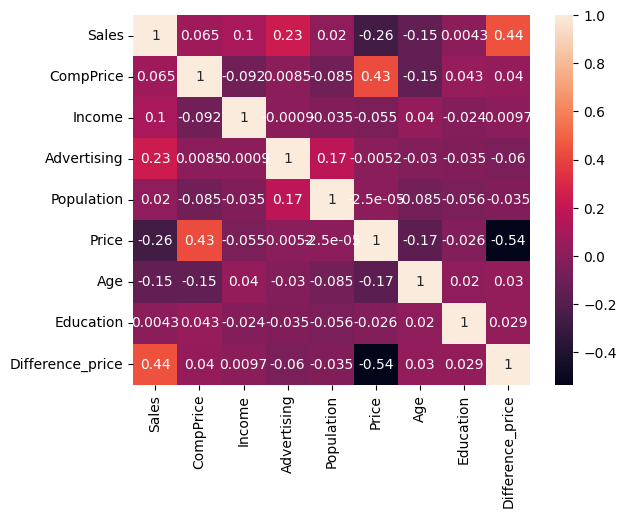

In [385]:
sns.heatmap(company_q.corr(),annot=True)

In [386]:
company_q[company_cat.columns]=company_cat
company_q.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Difference_price,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,1
1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1


In [387]:
x=company_q.drop("Sales", axis=1)
y=company_q["Sales"]

In [388]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [389]:
for i in range(1,20):
    model = DecisionTreeClassifier(criterion = 'gini',max_depth=i, random_state=40)
    model.fit(x_train,y_train)
    print(model.score(x_test,y_test))

0.6875
0.7875
0.775
0.8
0.7875
0.7875
0.7375
0.675
0.7125
0.7
0.6875
0.7375
0.6875
0.6875
0.6875
0.6875
0.6875
0.6875
0.6875


In [390]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=5)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8125

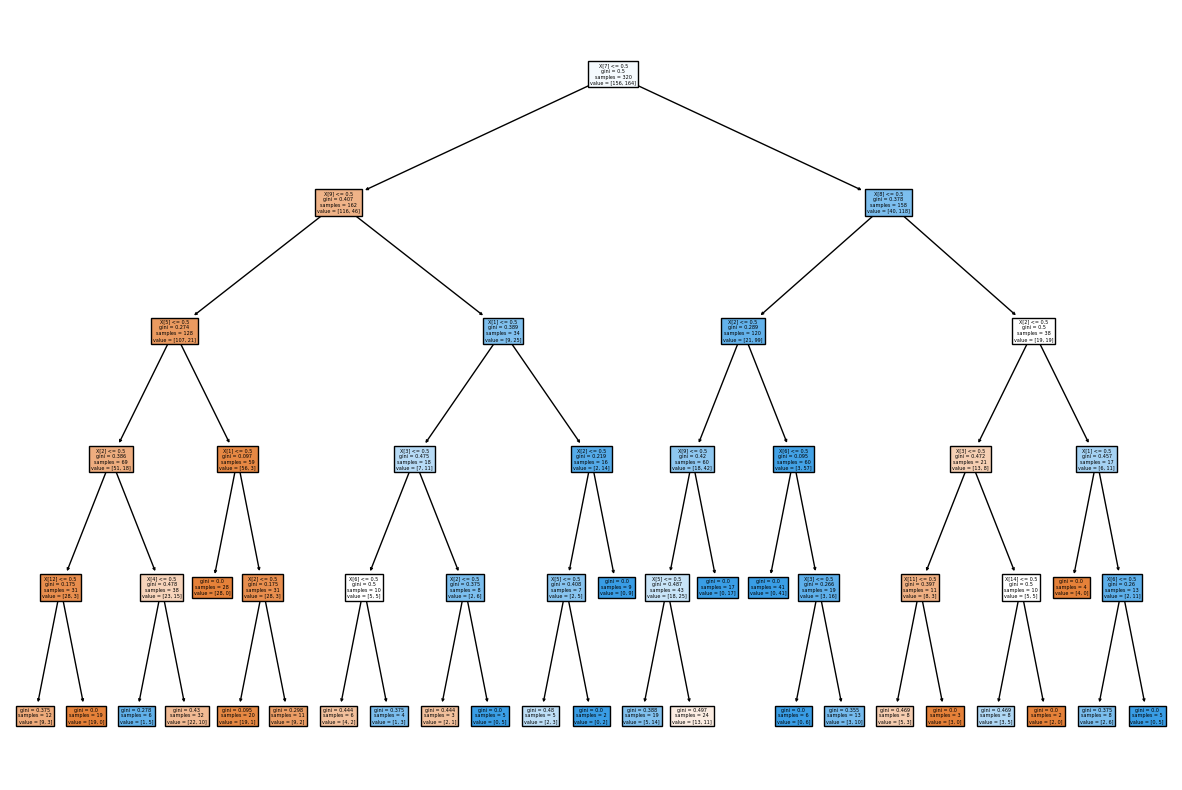

In [391]:
from matplotlib.pyplot import plot

plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True);

In [392]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Difference_price
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,13


In [393]:
column_cont

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Difference_price'],
      dtype='object')

In [394]:
company_scaled=scale.fit_transform(company[column_cont])

In [395]:
company_reg=pd.DataFrame(company_scaled, columns=column_cont)
company_reg

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Difference_price
0,0.710376,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,0.458454
1,1.320179,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,0.978243
2,0.908917,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,1.238138
3,-0.034151,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,0.562412
4,-1.186395,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,0.198559
...,...,...,...,...,...,...,...,...,...
395,1.798804,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208,0.042623
396,-0.480867,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033,0.510433
397,-0.030605,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529,-0.321230
398,-0.551774,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953,-0.217272


In [396]:
"income","Advertising","Price","Age","Difference_price"

('income', 'Advertising', 'Price', 'Age', 'Difference_price')

<AxesSubplot:>

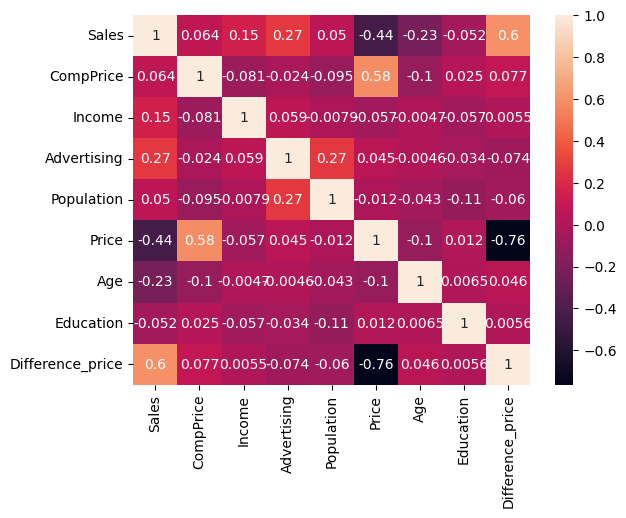

In [397]:
sns.heatmap(company_reg.corr(),annot=True)

In [398]:
x_reg=company_reg.drop(["Sales","CompPrice","Population","Education"],axis=1)
y_reg=company_reg["Sales"]

In [399]:
# Splitting data into training and testing data set
x_train_reg, x_test_reg,y_train_reg,y_test_reg = train_test_split(x_reg,y_reg, test_size=0.2,random_state=40)

In [400]:
from sklearn.tree import DecisionTreeRegressor
model_reg = DecisionTreeRegressor(random_state=40)
model_reg.fit(x_train_reg, y_train_reg)
model_reg.score(x_test_reg,y_test_reg)

0.024670506030923245

DecisionTree classifier works better in this case than Regressor